In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil

from rocket_fft import numpy_like, scipy_like

numpy_like()

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune
import alphatims.bruker as bruker

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan, Workflow

yaml_file = 'config.yaml'

raw_files = [
        '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_03_S4-F1_1_648.d',
        '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_04_S4-F4_1_651.d',
        '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_05_S4-F7_1_654.d',
        '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_06_S4-F10_1_657.d',
        '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_07_S4-G2_1_660.d',
        '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_08_S4-G5_1_663.d',
        '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_09_S4-G8_1_666.d',
        ]


output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_05_19_SyP5_single_cells'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')

0:00:00.918778  WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap_6z8vdjky. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 950,289,903,616
0:00:00.929782  WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
0:00:00.930100  INFO: 


In [2]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_d12_shared_eg_n_fragments_mbr.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)

In [3]:
import time

0:00:05.104258  PROGRESS:       _   _      _         ___ ___   _   
0:00:05.105018  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:05.105368  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:05.105602  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:05.105828  PROGRESS:            |_|                            
0:00:05.106059  PROGRESS: 
0:00:05.106406  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:05.112990  INFO: Applying config update from dict
0:00:05.113299  PROGRESS: version: 1.0.2
0:00:05.113549  PROGRESS: hostname: Georgs-MacBook-Pro.local
0:00:05.113898  PROGRESS: date: 2023-05-19 22:24:31
0:00:08.669916  INFO: renaming precursor_columns columns
0:00:08.670763  INFO: renaming fragment_columns columns
0:00:08.671214  INFO: ========= Library Stats =========
0:00:08.671452  INFO: Number of precursors: 220,333
0:00:08.701050  INFO: 	thereof targets:176,268
0:00:08.70

7820


  0%|          | 0/13713 [00:00<?, ?it/s]/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from float64 to float32. Precision may be lost.
  numba_func(i, *args)
/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from int64 to float32. Precision may be lost.
  numba_func(i, *args)
100%|██████████| 13713/13713 [00:01<00:00, 8062.43it/s] 
0:05:16.270184  INFO: Scored 13713 candidates
0:05:16.274925  INFO: 0.75% of targets failed, 1.22% of decoys failed
0:05:16.493178  INFO: number of dfs in features: 1, total number of features: 13578


(13578, 25)
(13578,)


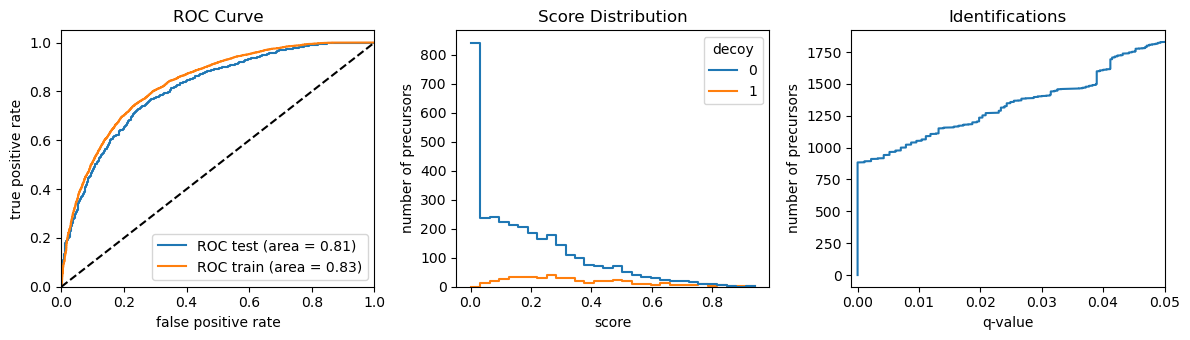

0:05:17.637007  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:05:17.638349  PROGRESS: Accumulated precursors: 3,883, 0.01 FDR: 1,054, 0.001 FDR: 885
0:05:17.639388  INFO: calibration group: precursor, fitting mz estimator 


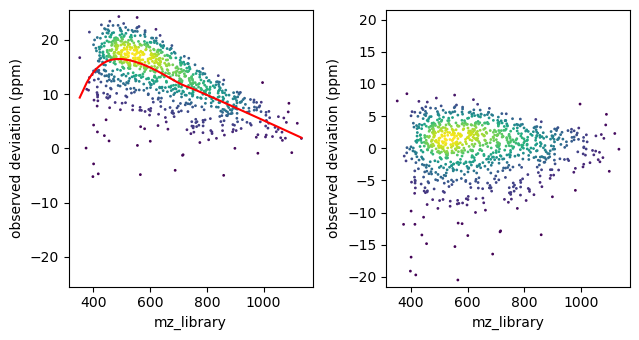

0:05:17.742063  INFO: calibration group: precursor, fitting rt estimator 


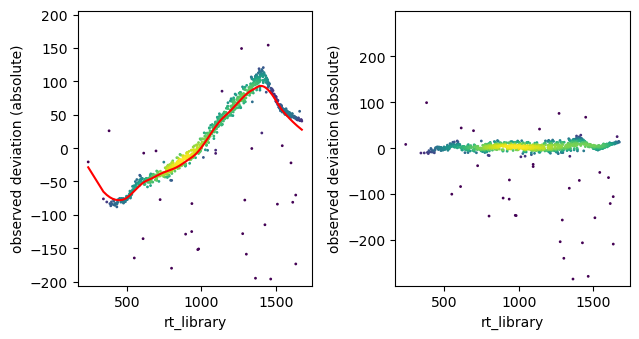

0:05:17.841332  INFO: calibration group: precursor, fitting mobility estimator 


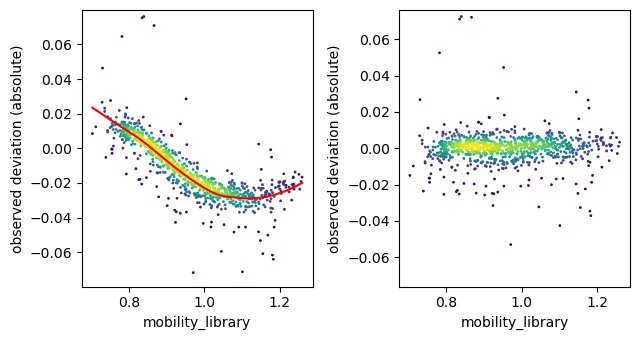

0:05:17.952287  INFO: calibration group: fragment, fitting mz estimator 


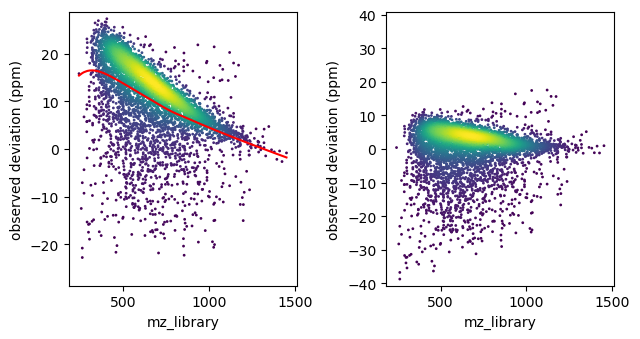

0:05:18.312008  INFO: calibration group: precursor, predicting mz
0:05:18.322781  INFO: calibration group: precursor, predicting rt
0:05:18.352677  INFO: calibration group: precursor, predicting mobility
0:05:18.370118  INFO: calibration group: fragment, predicting mz
0:05:18.681787  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:05:18.687603  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:05:18.691233  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:05:18.691576  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:05:18.691787  INFO: FWHM in RT is 4.05 seconds, sigma is 1.25
0:05:18.691943  INFO: FWHM in mobility is 0.006 1/K_0, sigma is 3.94


7818


100%|██████████| 11900/11900 [00:01<00:00, 10398.17it/s]
0:05:36.335542  INFO: Scored 11900 candidates
0:05:36.340528  INFO: 3.37% of targets failed, 5.45% of decoys failed
0:05:36.498716  INFO: number of dfs in features: 1, total number of features: 11376


(11376, 25)
(11376,)


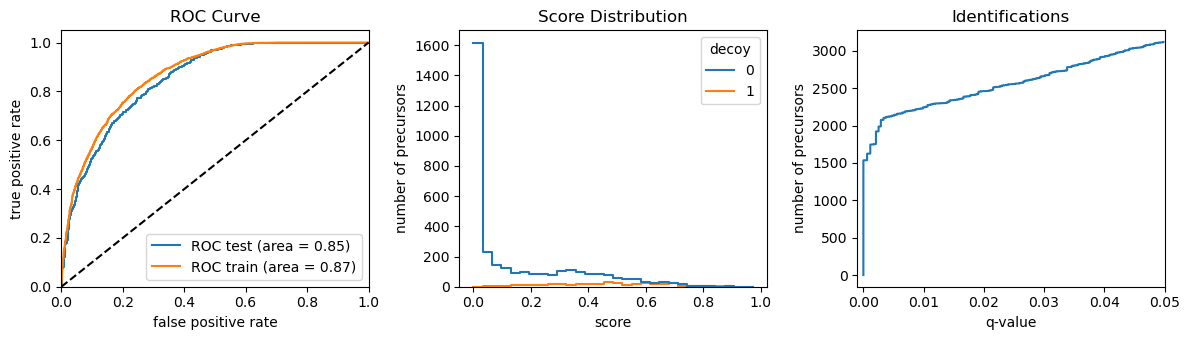

0:05:37.286101  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:05:37.286473  PROGRESS: Accumulated precursors: 3,768, 0.01 FDR: 2,244, 0.001 FDR: 1,624
0:05:37.287392  INFO: calibration group: precursor, fitting mz estimator 


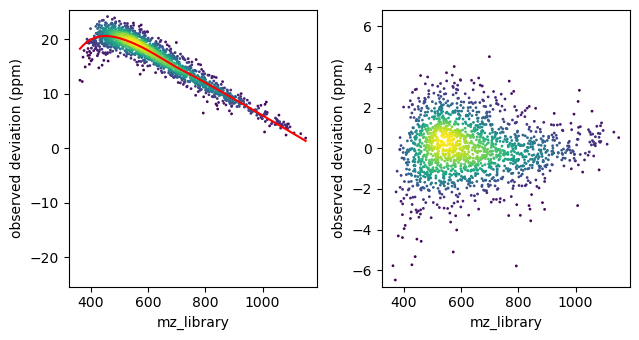

0:05:37.423994  INFO: calibration group: precursor, fitting rt estimator 


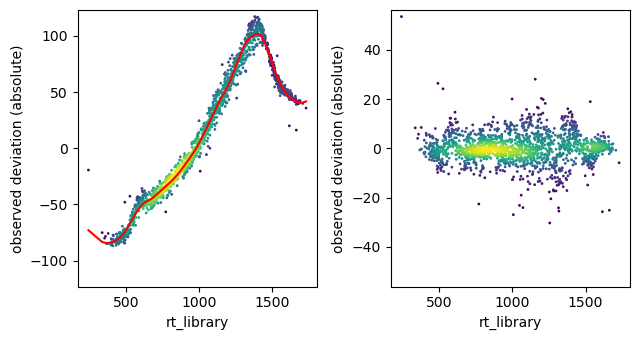

0:05:37.586409  INFO: calibration group: precursor, fitting mobility estimator 


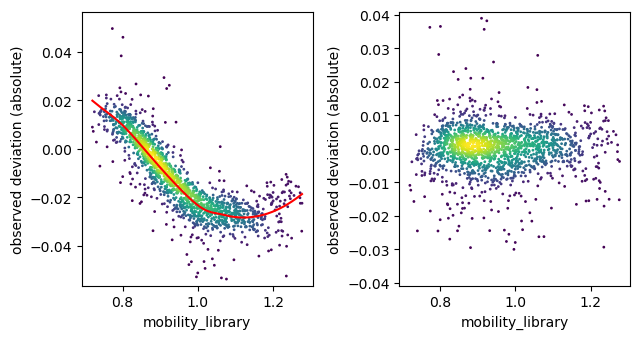

0:05:37.746831  INFO: calibration group: fragment, fitting mz estimator 


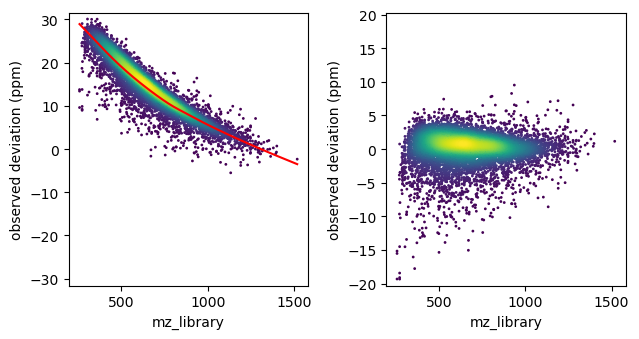

0:05:38.501607  INFO: calibration group: precursor, predicting mz
0:05:38.512112  INFO: calibration group: precursor, predicting rt
0:05:38.546846  INFO: calibration group: precursor, predicting mobility
0:05:38.560267  INFO: calibration group: fragment, predicting mz
0:05:38.881535  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:05:38.886082  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:05:38.887896  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:05:38.888229  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:05:38.888458  INFO: FWHM in RT is 3.53 seconds, sigma is 1.09
0:05:38.888668  INFO: FWHM in mobility is 0.005 1/K_0, sigma is 3.26


7802


100%|██████████| 11748/11748 [00:01<00:00, 10457.27it/s]
0:05:56.722302  INFO: Scored 11748 candidates
0:05:56.727792  INFO: 3.19% of targets failed, 4.86% of decoys failed
0:05:56.870828  INFO: number of dfs in features: 1, total number of features: 11276


(11276, 25)
(11276,)


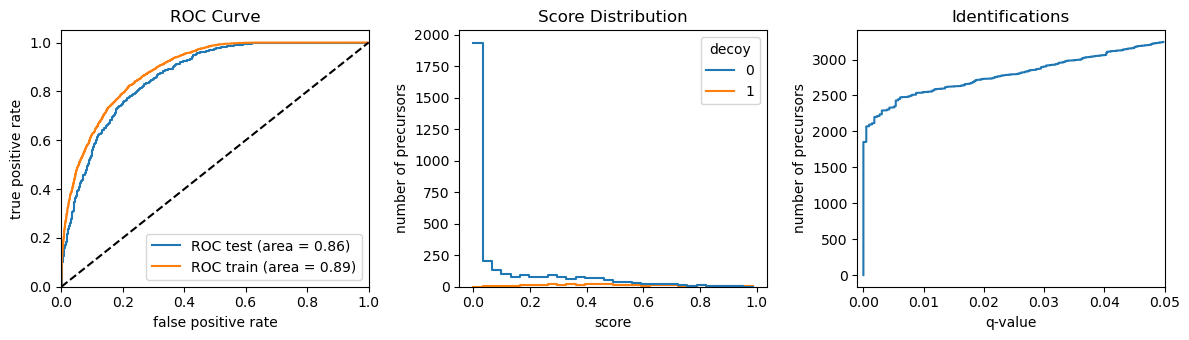

0:05:57.598040  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:05:57.598557  PROGRESS: Accumulated precursors: 3,761, 0.01 FDR: 2,548, 0.001 FDR: 2,096
0:05:57.599646  INFO: calibration group: precursor, fitting mz estimator 


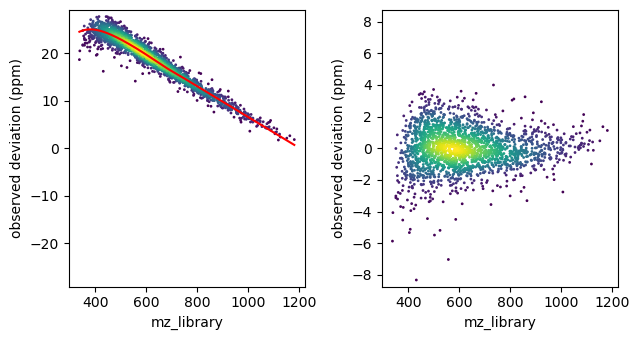

0:05:57.751923  INFO: calibration group: precursor, fitting rt estimator 


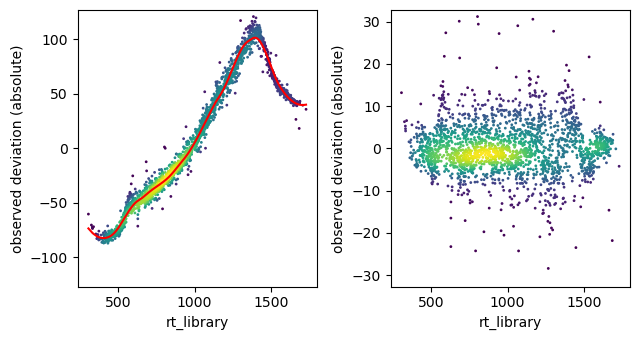

0:05:57.888075  INFO: calibration group: precursor, fitting mobility estimator 


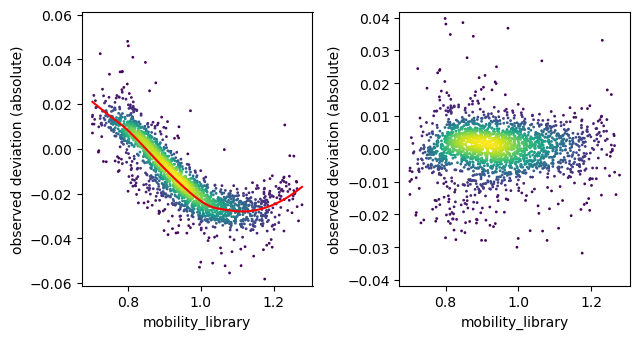

0:05:58.043066  INFO: calibration group: fragment, fitting mz estimator 


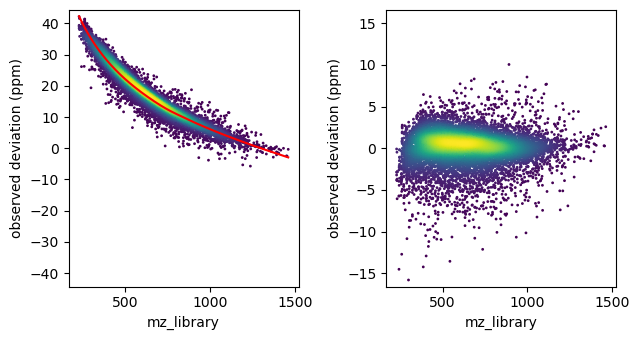

0:05:59.133216  INFO: calibration group: precursor, predicting mz
0:05:59.153367  INFO: calibration group: precursor, predicting rt
0:05:59.207844  INFO: calibration group: precursor, predicting mobility
0:05:59.225499  INFO: calibration group: fragment, predicting mz
0:05:59.552330  INFO: calibration group: precursor, predicting mz
0:05:59.567410  INFO: calibration group: precursor, predicting rt
0:05:59.598563  INFO: calibration group: precursor, predicting mobility
0:05:59.613594  INFO: calibration group: fragment, predicting mz
0:05:59.910497  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:05:59.925544  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:05:59.926084  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:05:59.926454  INFO: FWHM in RT is 3.68 seconds, sigma is 1.14
0:05:59.926733  INFO: FWHM in mobility is 0.005 1/K_0, sigma is 3.29


88132


100%|██████████| 280119/280119 [00:27<00:00, 10090.90it/s]
0:11:03.480686  INFO: Scored 280119 candidates
0:11:03.563722  INFO: 4.05% of targets failed, 5.87% of decoys failed


(266244, 25)
(266244,)


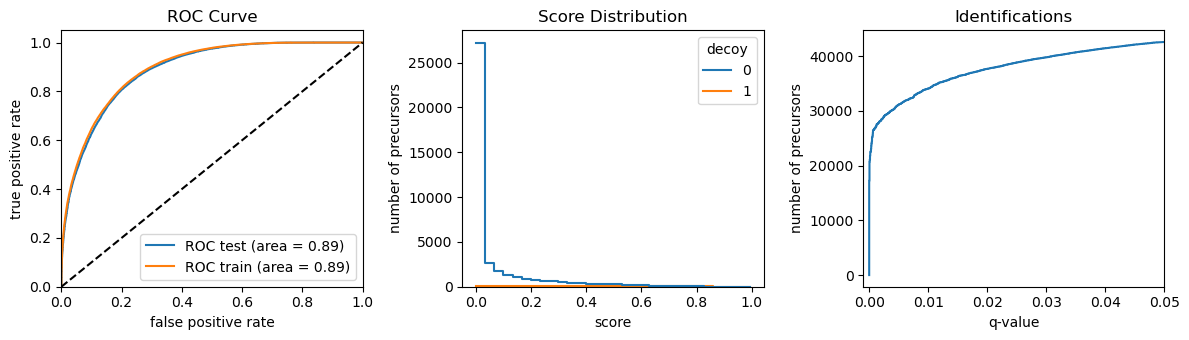

0:11:31.406158  PROGRESS: === extraction finished, 0.05 FDR: 40,534, 0.01 FDR: 33,713, 0.001 FDR: 26,780 ===
0:11:32.533326  INFO: calibration group: precursor, predicting mz
0:11:32.558004  INFO: calibration group: precursor, predicting rt
0:11:32.620296  INFO: calibration group: precursor, predicting mobility
0:11:32.650127  INFO: calibration group: fragment, predicting mz
100%|██████████| 33713/33713 [00:02<00:00, 16721.65it/s]
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:109: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

(65165, 60)
(65165,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


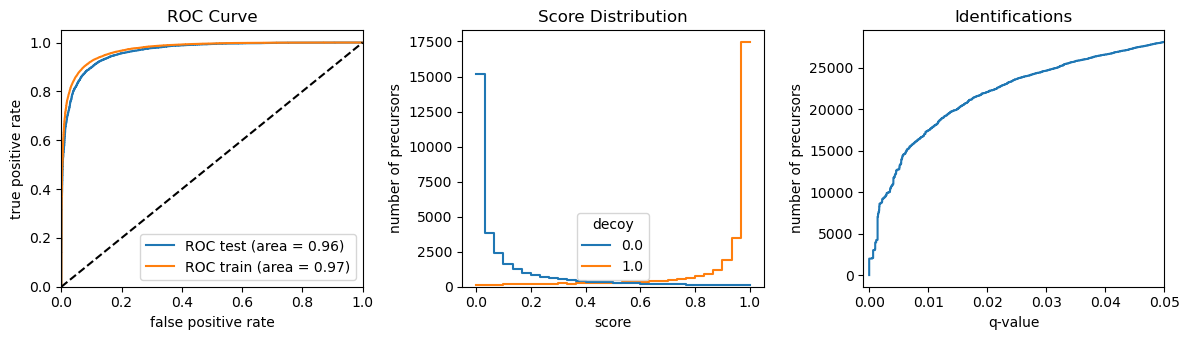

17447
3815
(65162, 60)
(65162,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['decoy'] = np.zeros(len(channel_df))
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


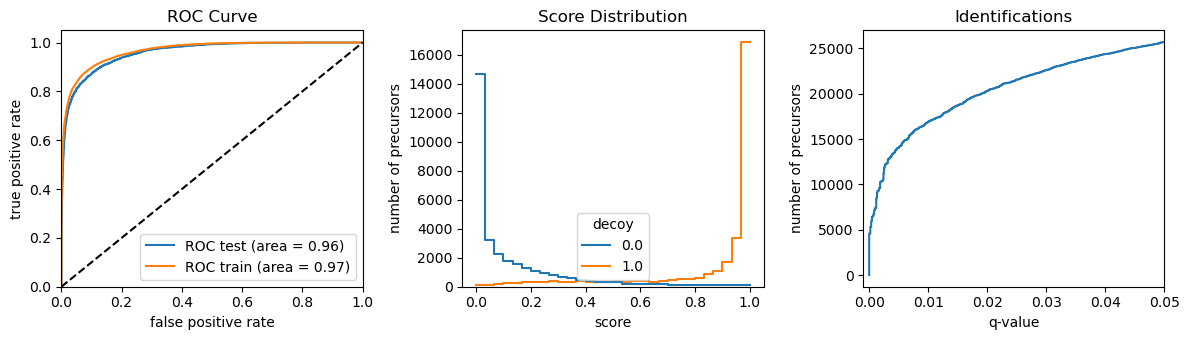

16901
3474


0:13:50.785785  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_04_S4-F4_1_651.d
0:13:50.786912  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_04_S4-F4_1_651.d
0:13:50.787247  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_04_S4-F4_1_651.d
0:13:51.387667  INFO: Reading 16,255 frames with 2,333,544,854 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_04_S4-F4_1_651.d
100%|██████████| 16255/16255 [00:07<00:00, 2142.41it/s]
0:13:59.069968  INFO: Indexing /Users/georgwallmann/Documents/data/alpha

7820


100%|██████████| 13791/13791 [00:01<00:00, 9700.91it/s]
0:17:36.421939  INFO: Scored 13791 candidates
0:17:36.427427  INFO: 0.85% of targets failed, 1.22% of decoys failed
0:17:36.499518  INFO: number of dfs in features: 1, total number of features: 13649


(13649, 25)
(13649,)


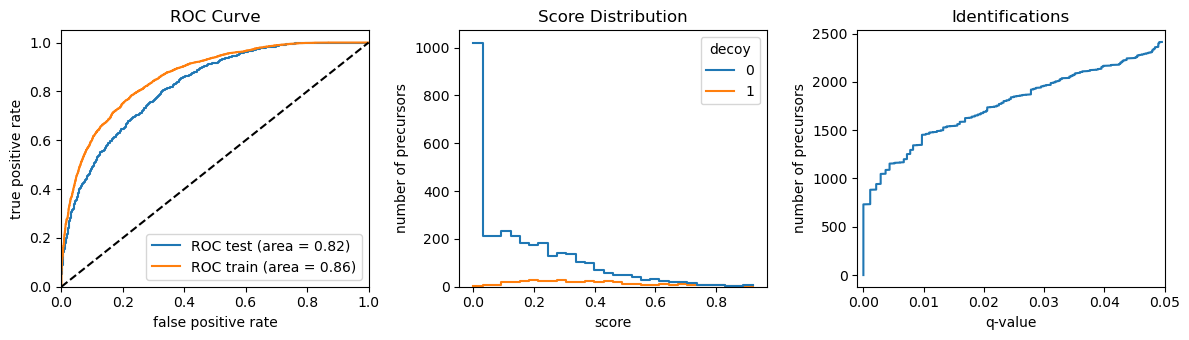

0:17:37.378018  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:17:37.378363  PROGRESS: Accumulated precursors: 3,891, 0.01 FDR: 1,453, 0.001 FDR: 733
0:17:37.379445  INFO: calibration group: precursor, fitting mz estimator 


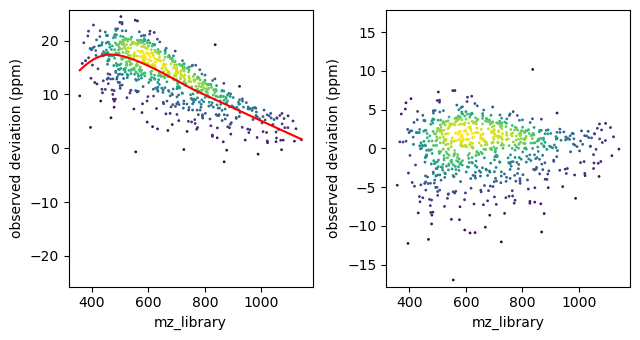

0:17:37.480307  INFO: calibration group: precursor, fitting rt estimator 


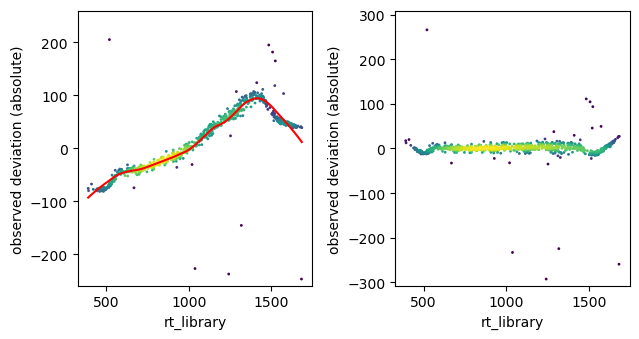

0:17:37.567523  INFO: calibration group: precursor, fitting mobility estimator 


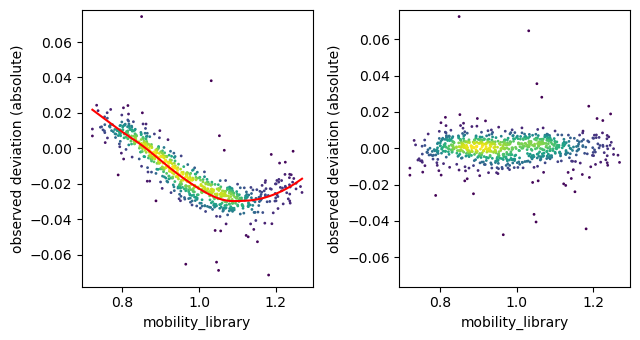

0:17:37.662839  INFO: calibration group: fragment, fitting mz estimator 


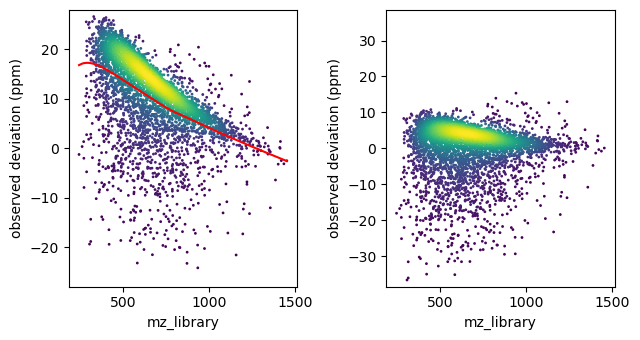

0:17:37.964197  INFO: calibration group: precursor, predicting mz
0:17:37.977660  INFO: calibration group: precursor, predicting rt
0:17:38.007251  INFO: calibration group: precursor, predicting mobility
0:17:38.022729  INFO: calibration group: fragment, predicting mz
0:17:38.344924  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:17:38.349233  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:17:38.350976  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:17:38.351244  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:38.351466  INFO: FWHM in RT is 3.86 seconds, sigma is 1.19
0:17:38.351735  INFO: FWHM in mobility is 0.006 1/K_0, sigma is 3.85


7836


100%|██████████| 11939/11939 [00:01<00:00, 10614.08it/s]
0:17:54.542348  INFO: Scored 11939 candidates
0:17:54.546366  INFO: 3.81% of targets failed, 6.32% of decoys failed
0:17:54.602746  INFO: number of dfs in features: 1, total number of features: 11335


(11335, 25)
(11335,)


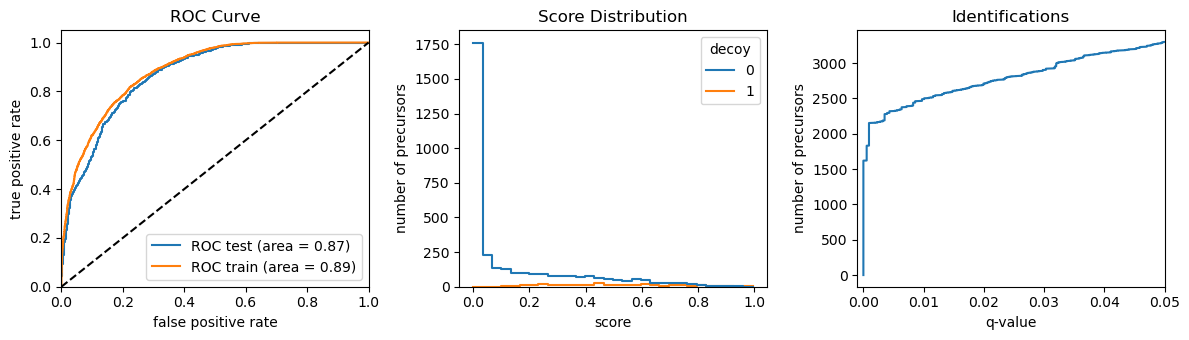

0:17:55.226526  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:17:55.226819  PROGRESS: Accumulated precursors: 3,784, 0.01 FDR: 2,491, 0.001 FDR: 2,154
0:17:55.228006  INFO: calibration group: precursor, fitting mz estimator 


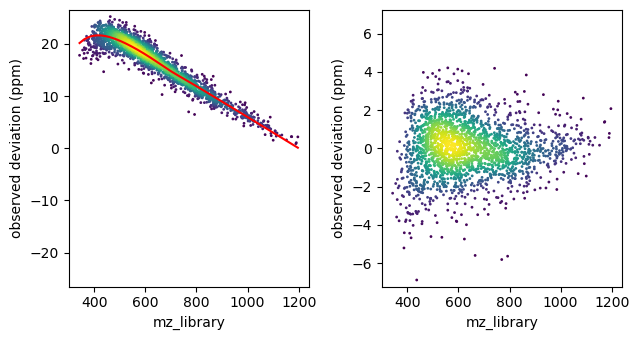

0:17:55.378163  INFO: calibration group: precursor, fitting rt estimator 


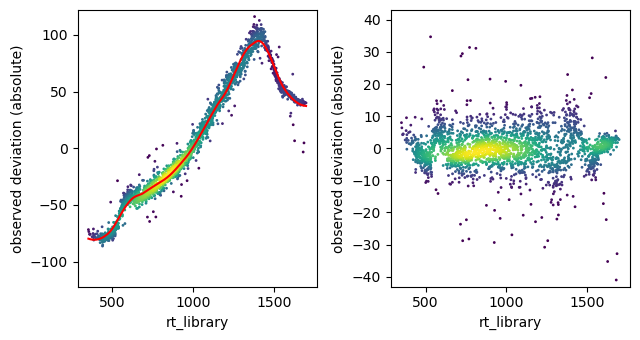

0:17:55.521643  INFO: calibration group: precursor, fitting mobility estimator 


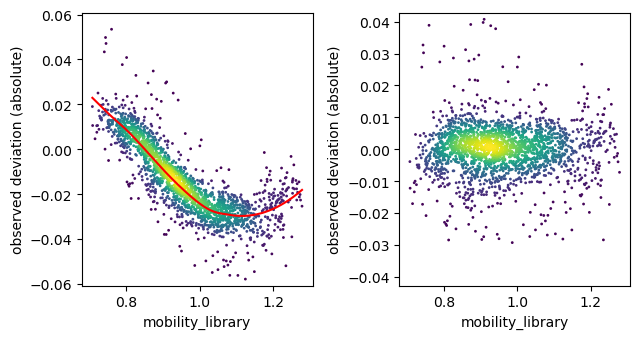

0:17:55.672102  INFO: calibration group: fragment, fitting mz estimator 


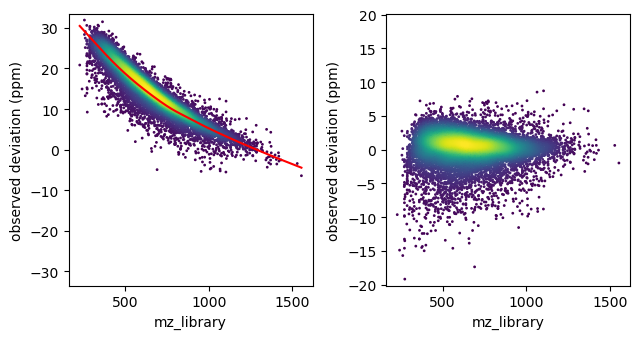

0:17:56.761925  INFO: calibration group: precursor, predicting mz
0:17:56.783465  INFO: calibration group: precursor, predicting rt
0:17:56.815893  INFO: calibration group: precursor, predicting mobility
0:17:56.827173  INFO: calibration group: fragment, predicting mz
0:17:57.124416  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:17:57.129051  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:17:57.130834  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:17:57.131160  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:57.131389  INFO: FWHM in RT is 3.42 seconds, sigma is 1.06
0:17:57.131594  INFO: FWHM in mobility is 0.005 1/K_0, sigma is 2.99


7806


100%|██████████| 11661/11661 [00:01<00:00, 10426.29it/s]
0:18:12.641969  INFO: Scored 11661 candidates
0:18:12.645949  INFO: 3.73% of targets failed, 4.98% of decoys failed
0:18:12.700104  INFO: number of dfs in features: 1, total number of features: 11154


(11154, 25)
(11154,)


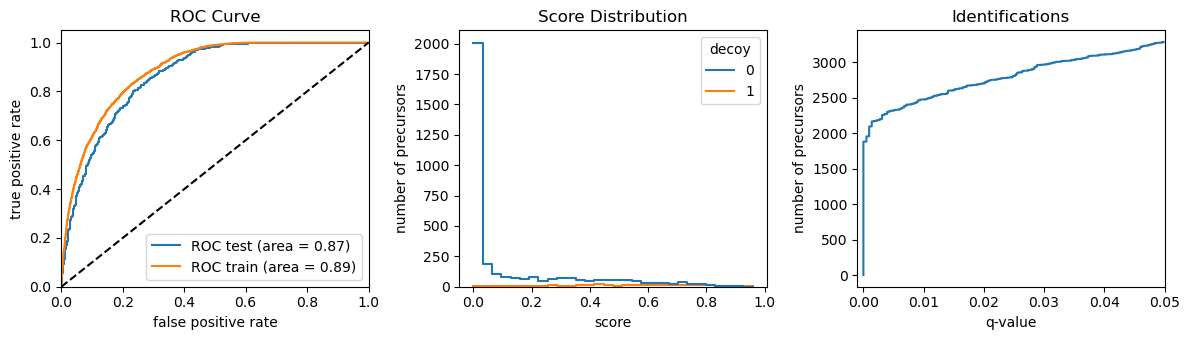

0:18:13.447599  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:18:13.447879  PROGRESS: Accumulated precursors: 3,758, 0.01 FDR: 2,475, 0.001 FDR: 2,094
0:18:13.449017  INFO: calibration group: precursor, fitting mz estimator 


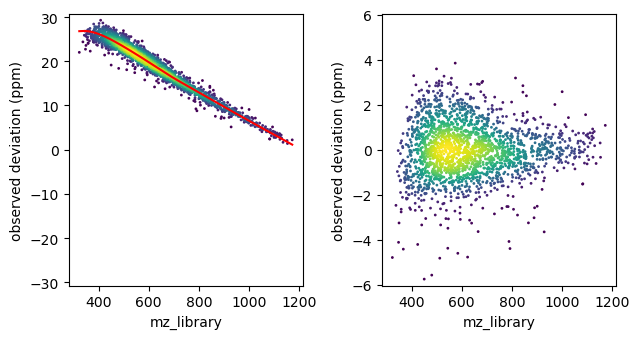

0:18:14.003619  INFO: calibration group: precursor, fitting rt estimator 


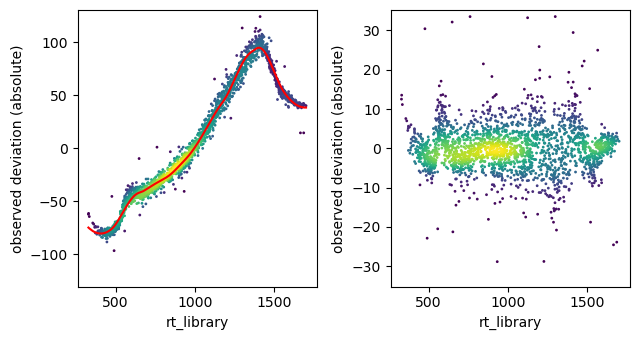

0:18:14.143062  INFO: calibration group: precursor, fitting mobility estimator 


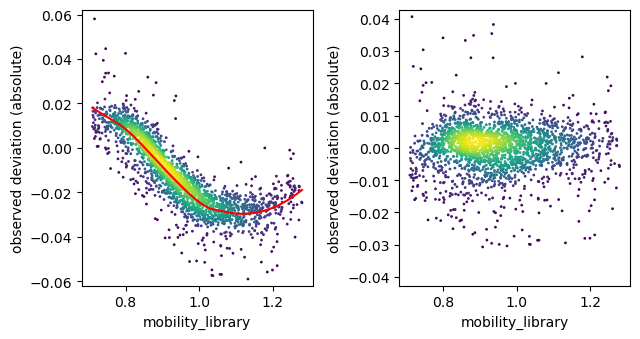

0:18:14.305256  INFO: calibration group: fragment, fitting mz estimator 


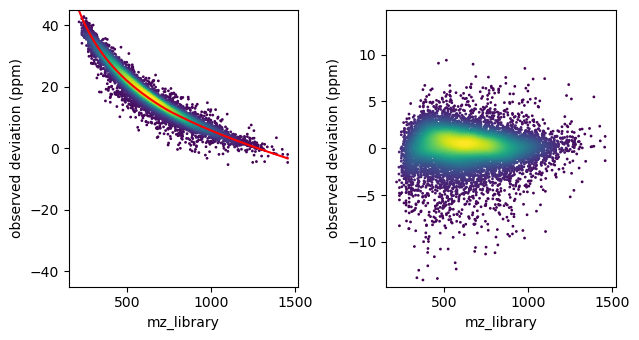

0:18:15.427686  INFO: calibration group: precursor, predicting mz
0:18:15.439747  INFO: calibration group: precursor, predicting rt
0:18:15.470447  INFO: calibration group: precursor, predicting mobility
0:18:15.481646  INFO: calibration group: fragment, predicting mz
0:18:15.833448  INFO: calibration group: precursor, predicting mz
0:18:15.847483  INFO: calibration group: precursor, predicting rt
0:18:15.871531  INFO: calibration group: precursor, predicting mobility
0:18:15.882248  INFO: calibration group: fragment, predicting mz
0:18:16.186536  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:18:16.199944  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:18:16.200346  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:18:16.200591  INFO: FWHM in RT is 3.57 seconds, sigma is 1.10
0:18:16.200786  INFO: FWHM in mobility is 0.005 1/K_0, sigma is 3.29


88132


100%|██████████| 280484/280484 [00:27<00:00, 10260.54it/s]
0:22:58.127936  INFO: Scored 280484 candidates
0:22:58.209019  INFO: 4.06% of targets failed, 5.86% of decoys failed


(266581, 25)
(266581,)


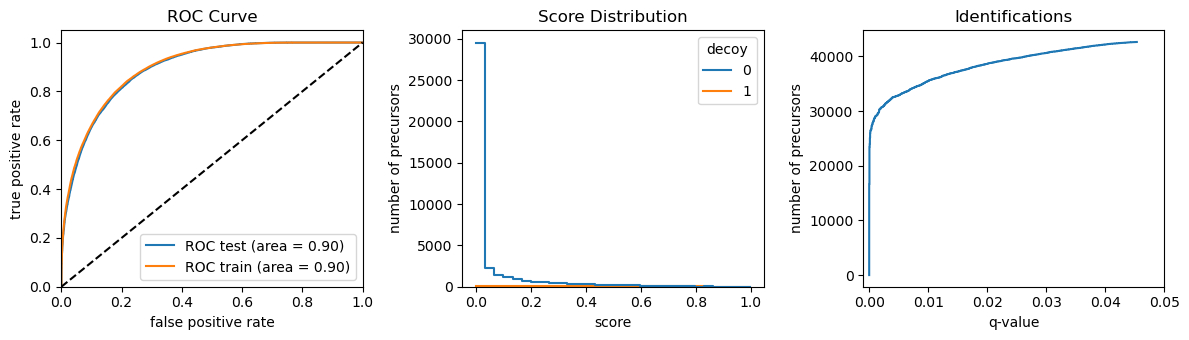

0:23:24.237058  PROGRESS: === extraction finished, 0.05 FDR: 40,786, 0.01 FDR: 35,155, 0.001 FDR: 28,840 ===
0:23:25.348262  INFO: calibration group: precursor, predicting mz
0:23:25.368660  INFO: calibration group: precursor, predicting rt
0:23:25.430959  INFO: calibration group: precursor, predicting mobility
0:23:25.455007  INFO: calibration group: fragment, predicting mz
100%|██████████| 35155/35155 [00:01<00:00, 34452.58it/s]
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:109: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

(67972, 60)
(67972,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


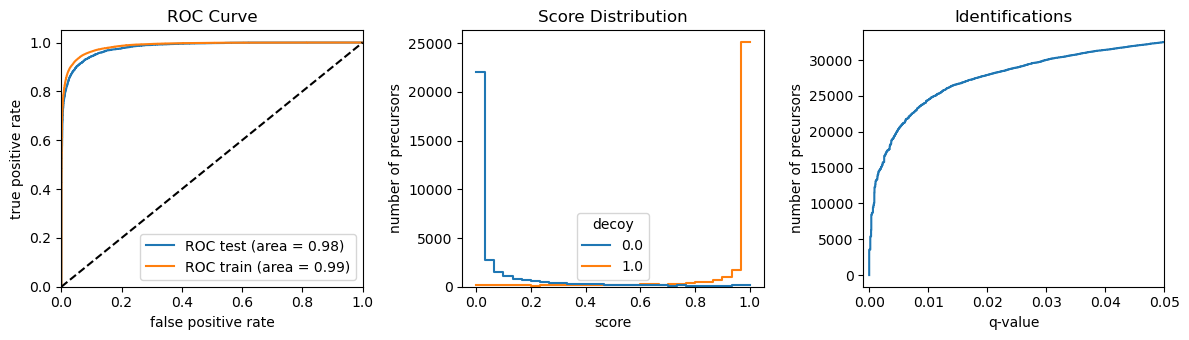

24450
4173
(67967, 60)
(67967,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['decoy'] = np.zeros(len(channel_df))
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


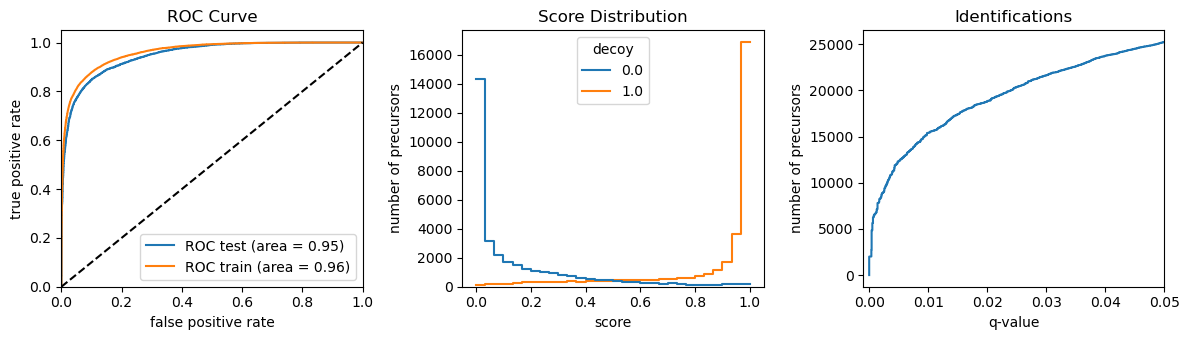

15395
3442


0:24:47.704196  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_05_S4-F7_1_654.d
0:24:47.705374  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_05_S4-F7_1_654.d
0:24:47.705724  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_05_S4-F7_1_654.d
0:24:48.330779  INFO: Reading 16,255 frames with 2,226,182,950 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_05_S4-F7_1_654.d
100%|██████████| 16255/16255 [00:07<00:00, 2238.59it/s]
0:24:55.657623  INFO: Indexing /Users/georgwallmann/Documents/data/alpha

7780


100%|██████████| 13655/13655 [00:01<00:00, 10050.15it/s]
0:28:23.920599  INFO: Scored 13655 candidates
0:28:23.924978  INFO: 1.13% of targets failed, 1.50% of decoys failed
0:28:24.028759  INFO: number of dfs in features: 1, total number of features: 13476


(13476, 25)
(13476,)


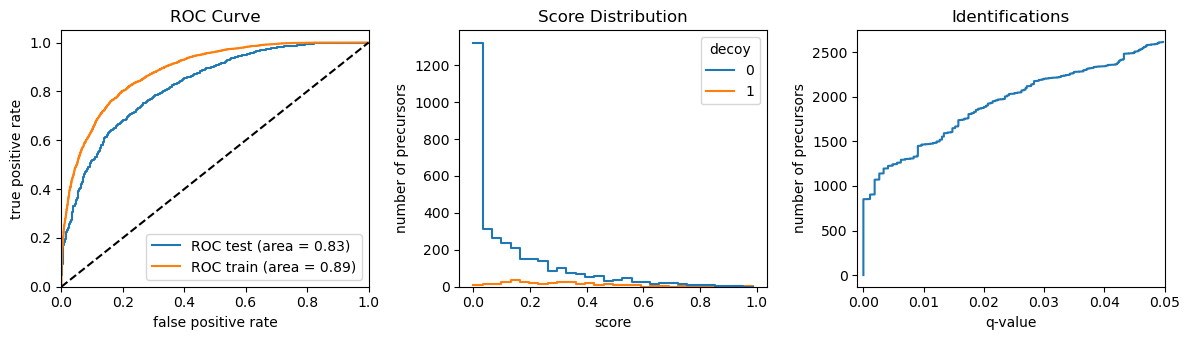

0:28:25.743821  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:28:25.744266  PROGRESS: Accumulated precursors: 3,854, 0.01 FDR: 1,465, 0.001 FDR: 852
0:28:25.745059  INFO: calibration group: precursor, fitting mz estimator 


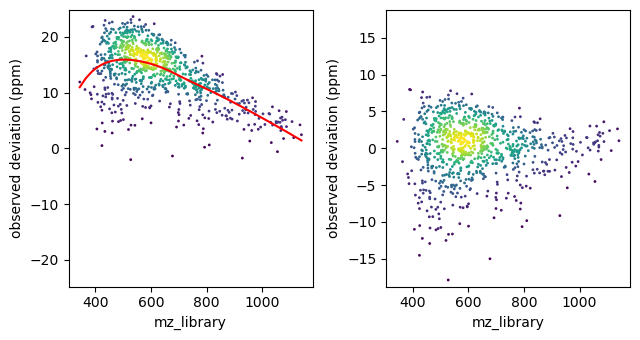

0:28:25.839611  INFO: calibration group: precursor, fitting rt estimator 


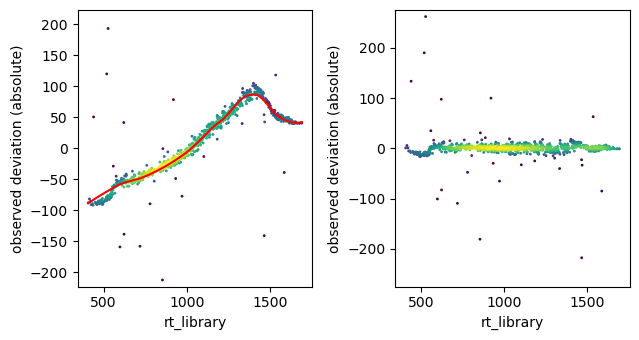

0:28:25.935580  INFO: calibration group: precursor, fitting mobility estimator 


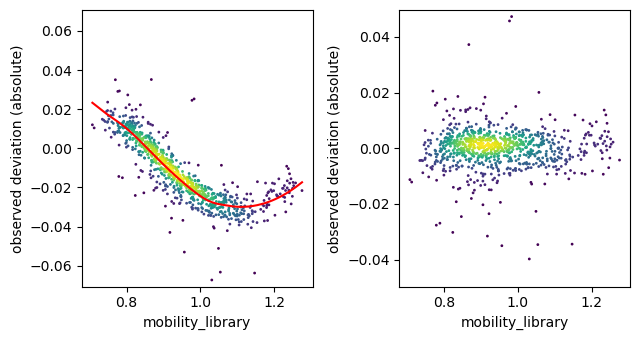

0:28:26.034346  INFO: calibration group: fragment, fitting mz estimator 


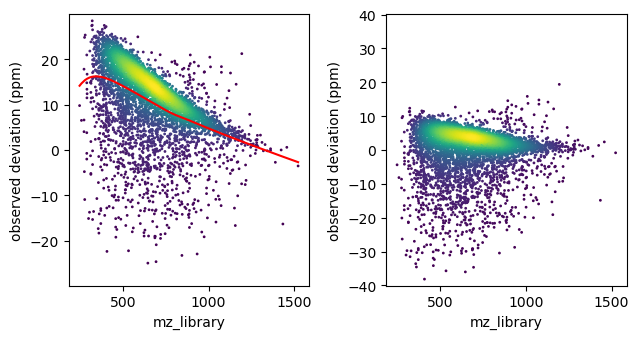

0:28:26.390381  INFO: calibration group: precursor, predicting mz
0:28:26.399426  INFO: calibration group: precursor, predicting rt
0:28:26.495933  INFO: calibration group: precursor, predicting mobility
0:28:26.514623  INFO: calibration group: fragment, predicting mz
0:28:26.838641  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:28:26.843026  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:28:26.844798  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:28:26.845107  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:28:26.845352  INFO: FWHM in RT is 4.00 seconds, sigma is 1.24
0:28:26.845594  INFO: FWHM in mobility is 0.006 1/K_0, sigma is 3.97


7800


100%|██████████| 11902/11902 [00:01<00:00, 10345.91it/s]
0:28:43.175570  INFO: Scored 11902 candidates
0:28:43.179469  INFO: 4.00% of targets failed, 6.43% of decoys failed
0:28:43.267262  INFO: number of dfs in features: 1, total number of features: 11281


(11281, 25)
(11281,)


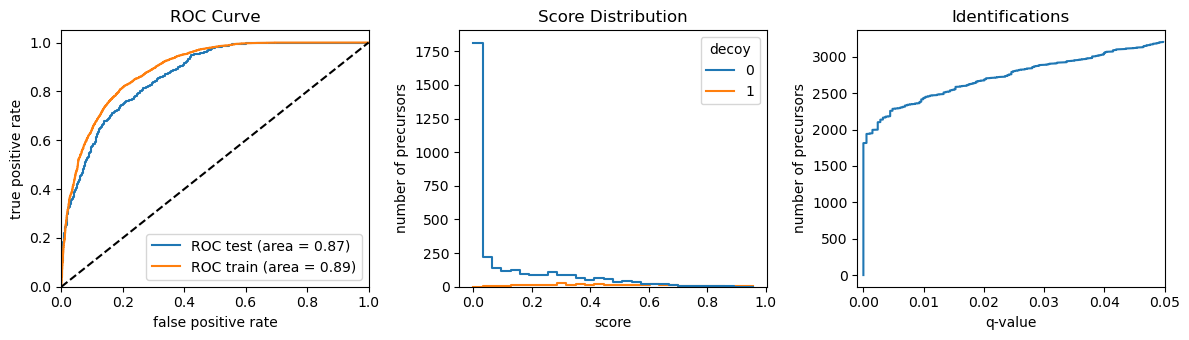

0:28:44.238429  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:28:44.238769  PROGRESS: Accumulated precursors: 3,753, 0.01 FDR: 2,436, 0.001 FDR: 1,941
0:28:44.240044  INFO: calibration group: precursor, fitting mz estimator 


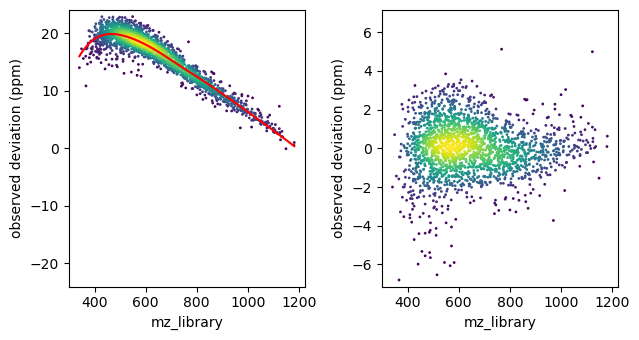

0:28:44.376255  INFO: calibration group: precursor, fitting rt estimator 


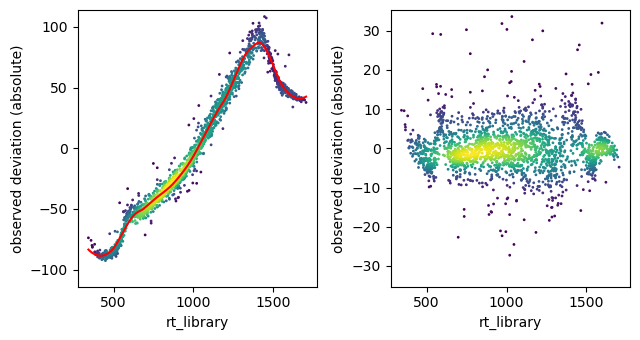

0:28:44.523924  INFO: calibration group: precursor, fitting mobility estimator 


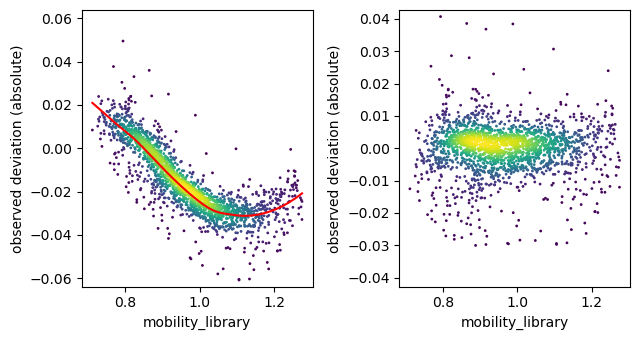

0:28:44.676794  INFO: calibration group: fragment, fitting mz estimator 


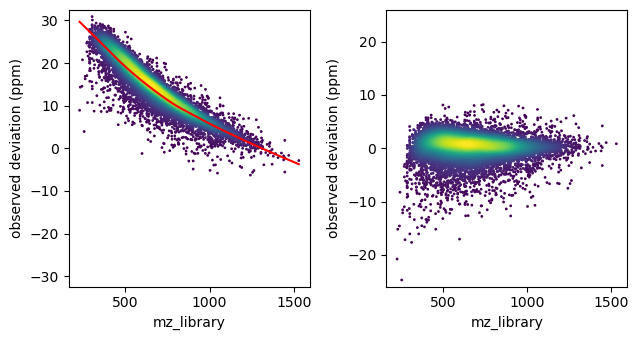

0:28:45.687001  INFO: calibration group: precursor, predicting mz
0:28:45.696068  INFO: calibration group: precursor, predicting rt
0:28:45.721850  INFO: calibration group: precursor, predicting mobility
0:28:45.739871  INFO: calibration group: fragment, predicting mz
0:28:46.050767  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:28:46.055205  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:28:46.057020  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:28:46.057308  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:28:46.057510  INFO: FWHM in RT is 3.38 seconds, sigma is 1.04
0:28:46.057732  INFO: FWHM in mobility is 0.005 1/K_0, sigma is 3.06


7817


100%|██████████| 11758/11758 [00:01<00:00, 10457.22it/s]
0:29:02.326459  INFO: Scored 11758 candidates
0:29:02.330233  INFO: 3.71% of targets failed, 7.01% of decoys failed
0:29:02.425704  INFO: number of dfs in features: 1, total number of features: 11128


(11128, 25)
(11128,)


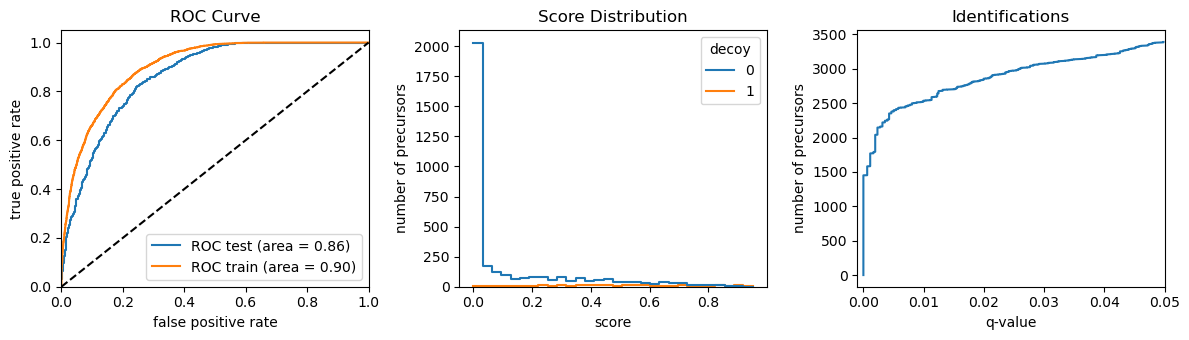

0:29:03.393863  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:29:03.394206  PROGRESS: Accumulated precursors: 3,761, 0.01 FDR: 2,537, 0.001 FDR: 1,583
0:29:03.395015  INFO: calibration group: precursor, fitting mz estimator 


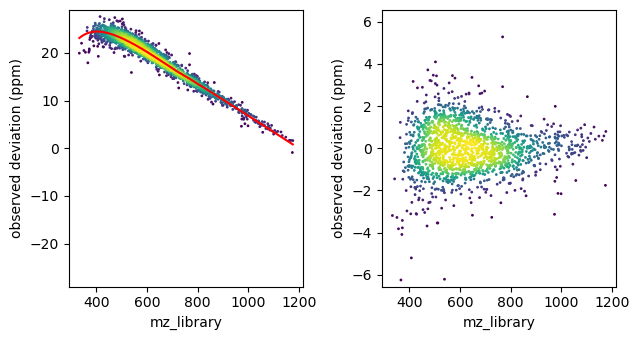

0:29:03.515101  INFO: calibration group: precursor, fitting rt estimator 


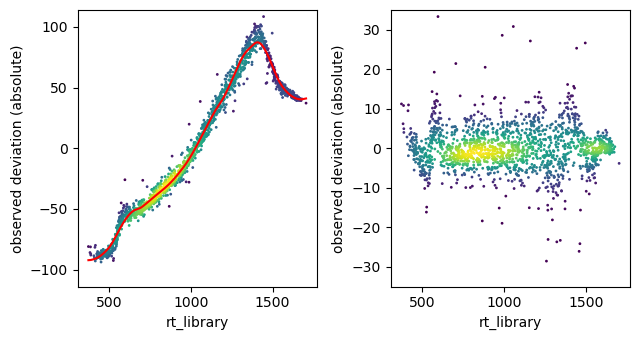

0:29:03.637802  INFO: calibration group: precursor, fitting mobility estimator 


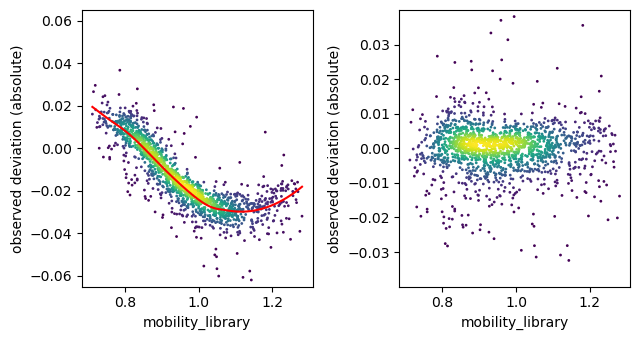

0:29:03.769246  INFO: calibration group: fragment, fitting mz estimator 


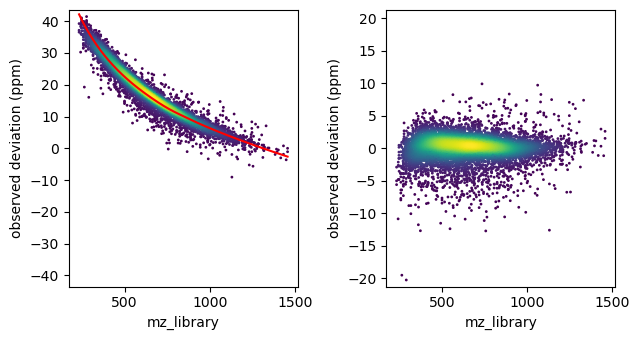

0:29:04.558106  INFO: calibration group: precursor, predicting mz
0:29:04.570088  INFO: calibration group: precursor, predicting rt
0:29:04.592853  INFO: calibration group: precursor, predicting mobility
0:29:04.608535  INFO: calibration group: fragment, predicting mz
0:29:04.970470  INFO: calibration group: precursor, predicting mz
0:29:04.981242  INFO: calibration group: precursor, predicting rt
0:29:05.004524  INFO: calibration group: precursor, predicting mobility
0:29:05.016110  INFO: calibration group: fragment, predicting mz
0:29:05.405037  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:29:05.417911  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:29:05.418463  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:29:05.418862  INFO: FWHM in RT is 3.71 seconds, sigma is 1.15
0:29:05.419122  INFO: FWHM in mobility is 0.006 1/K_0, sigma is 3.63


88132


100%|██████████| 283625/283625 [00:32<00:00, 8771.85it/s] 
0:35:10.940107  INFO: Scored 283625 candidates
0:35:11.039344  INFO: 4.57% of targets failed, 6.69% of decoys failed


(267665, 25)
(267665,)


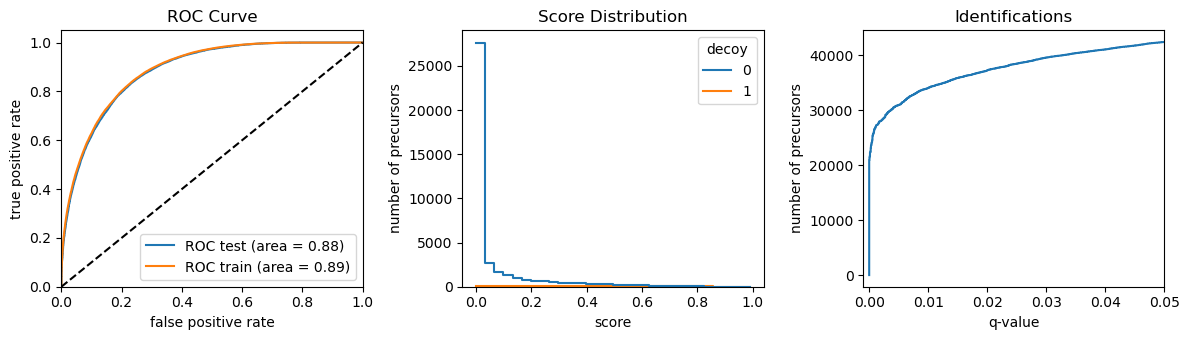

0:35:28.981418  PROGRESS: === extraction finished, 0.05 FDR: 40,382, 0.01 FDR: 33,705, 0.001 FDR: 26,708 ===
0:35:30.058604  INFO: calibration group: precursor, predicting mz
0:35:30.080614  INFO: calibration group: precursor, predicting rt
0:35:30.156280  INFO: calibration group: precursor, predicting mobility
0:35:30.181869  INFO: calibration group: fragment, predicting mz
100%|██████████| 33705/33705 [00:02<00:00, 15599.72it/s]
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:109: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

(65206, 60)
(65206,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


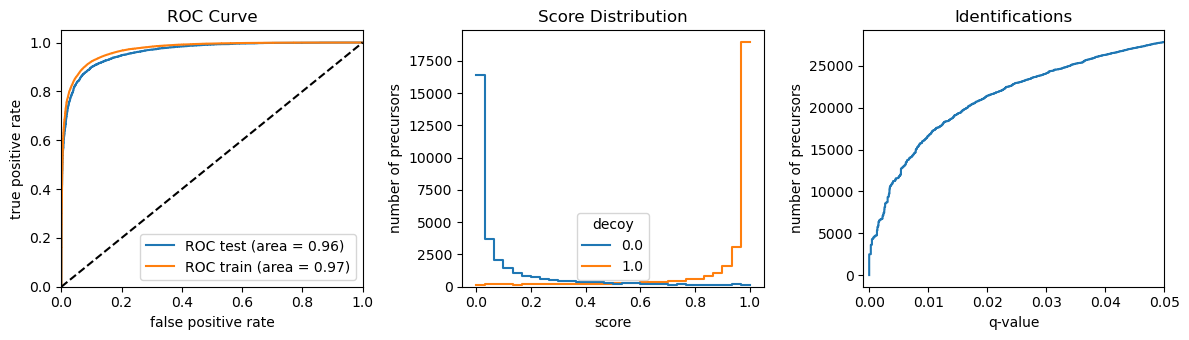

16605
3799
(65194, 60)
(65194,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['decoy'] = np.zeros(len(channel_df))
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


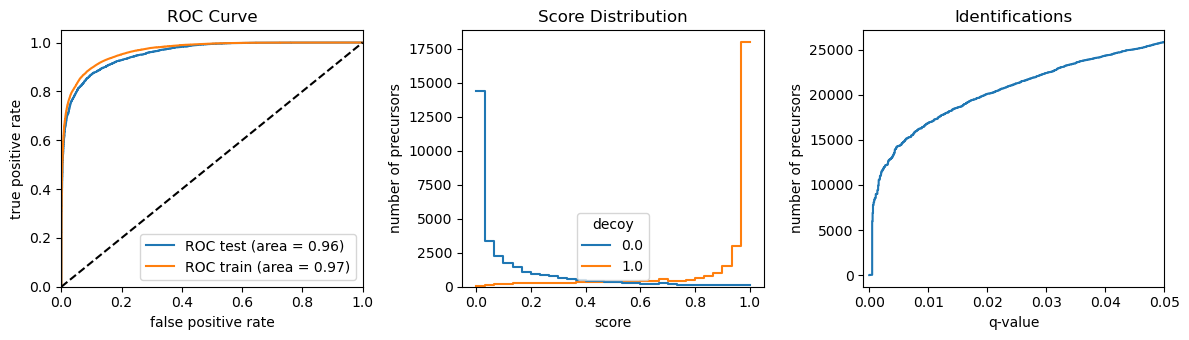

16876
3466


0:40:04.326824  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_06_S4-F10_1_657.d
0:40:04.330848  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_06_S4-F10_1_657.d
0:40:04.331165  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_06_S4-F10_1_657.d
0:40:05.078938  INFO: Reading 16,256 frames with 2,178,142,218 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_06_S4-F10_1_657.d
100%|██████████| 16256/16256 [00:07<00:00, 2130.34it/s]
0:40:12.783275  INFO: Indexing /Users/georgwallmann/Documents/data/a

7822


100%|██████████| 13704/13704 [00:01<00:00, 9919.13it/s]
0:44:23.378038  INFO: Scored 13704 candidates
0:44:23.382936  INFO: 0.81% of targets failed, 1.31% of decoys failed
0:44:23.516962  INFO: number of dfs in features: 1, total number of features: 13559


(13559, 25)
(13559,)


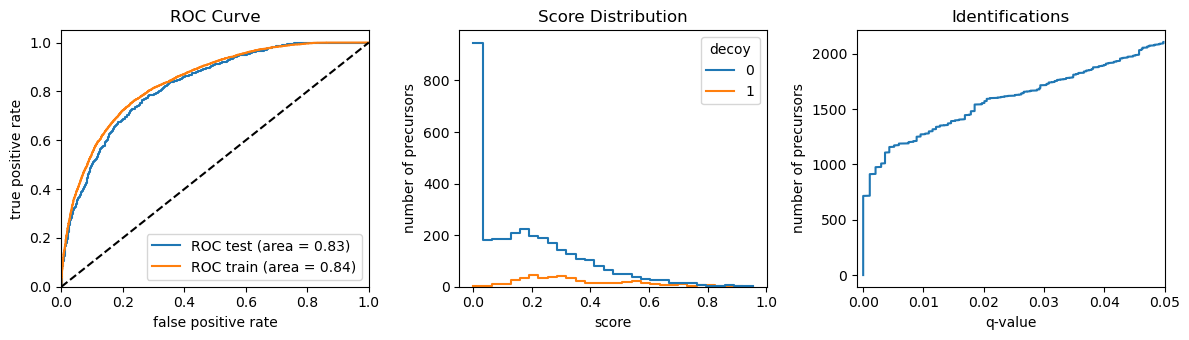

0:44:24.777492  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:44:24.778272  PROGRESS: Accumulated precursors: 3,880, 0.01 FDR: 1,272, 0.001 FDR: 716
0:44:24.779304  INFO: calibration group: precursor, fitting mz estimator 


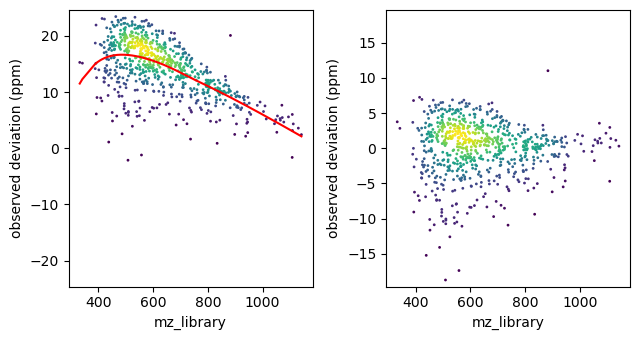

0:44:24.896445  INFO: calibration group: precursor, fitting rt estimator 


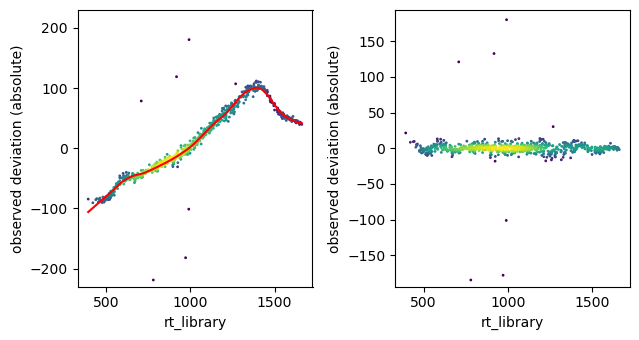

0:44:25.005848  INFO: calibration group: precursor, fitting mobility estimator 


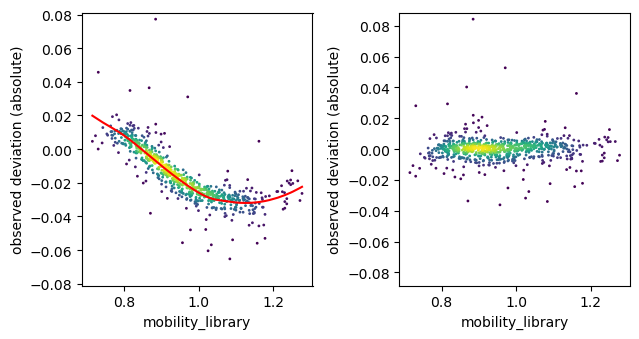

0:44:25.115066  INFO: calibration group: fragment, fitting mz estimator 


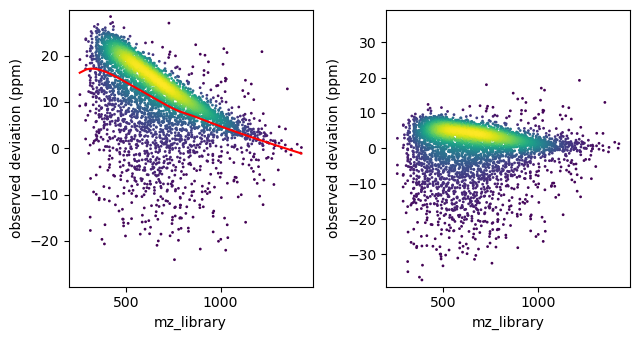

0:44:25.410122  INFO: calibration group: precursor, predicting mz
0:44:25.422170  INFO: calibration group: precursor, predicting rt
0:44:25.483286  INFO: calibration group: precursor, predicting mobility
0:44:25.497550  INFO: calibration group: fragment, predicting mz
0:44:25.832741  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:44:25.837326  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:44:25.839274  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:44:25.839595  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:44:25.839813  INFO: FWHM in RT is 4.10 seconds, sigma is 1.27
0:44:25.840030  INFO: FWHM in mobility is 0.006 1/K_0, sigma is 4.06


7852


100%|██████████| 12038/12038 [00:01<00:00, 10359.82it/s]
0:44:42.663004  INFO: Scored 12038 candidates
0:44:42.667900  INFO: 4.01% of targets failed, 6.17% of decoys failed
0:44:42.767711  INFO: number of dfs in features: 1, total number of features: 11426


(11426, 25)
(11426,)


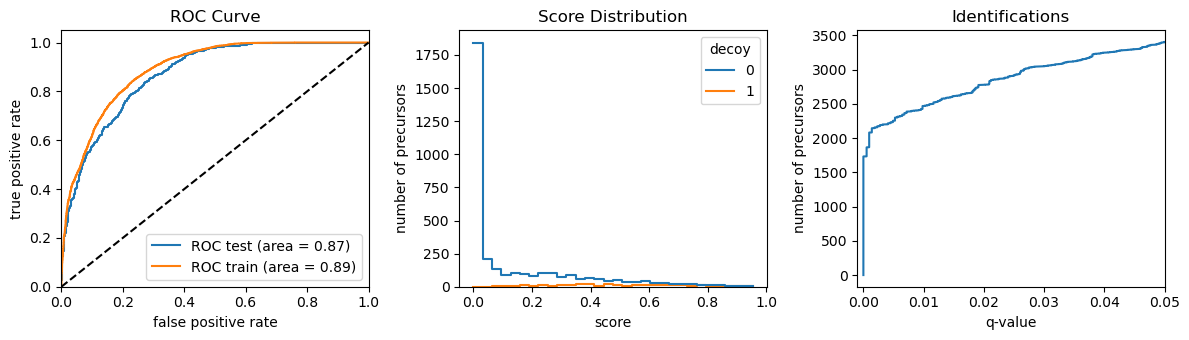

0:44:43.929108  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:44:43.929500  PROGRESS: Accumulated precursors: 3,766, 0.01 FDR: 2,468, 0.001 FDR: 2,081
0:44:43.930599  INFO: calibration group: precursor, fitting mz estimator 


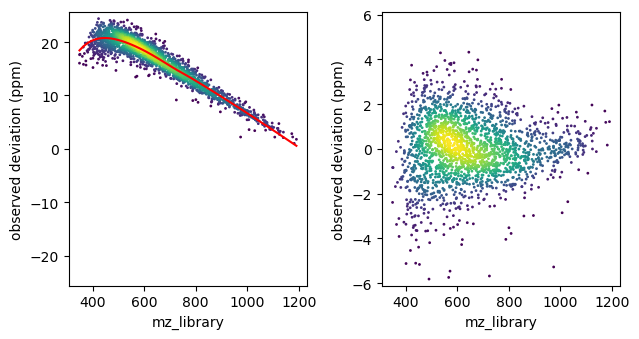

0:44:44.091669  INFO: calibration group: precursor, fitting rt estimator 


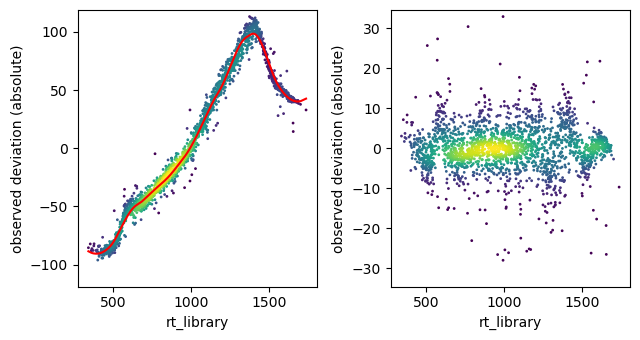

0:44:44.236806  INFO: calibration group: precursor, fitting mobility estimator 


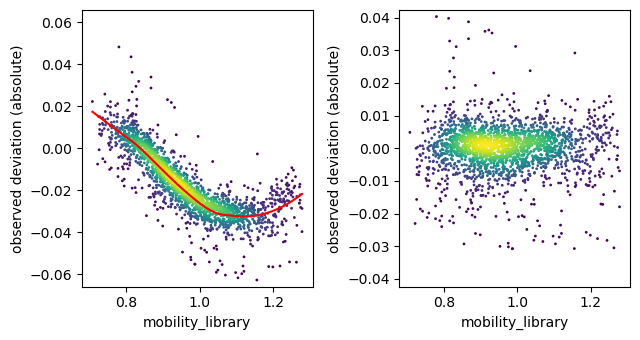

0:44:44.394125  INFO: calibration group: fragment, fitting mz estimator 


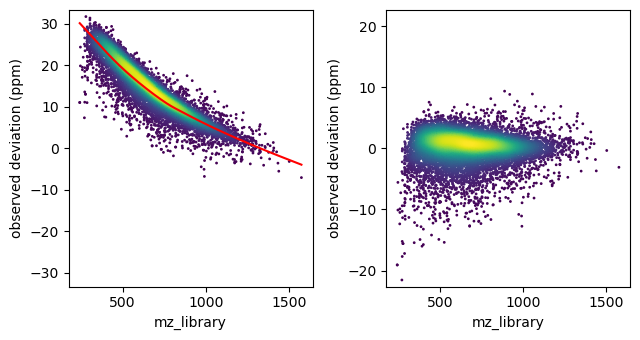

0:44:45.484009  INFO: calibration group: precursor, predicting mz
0:44:45.494424  INFO: calibration group: precursor, predicting rt
0:44:45.552165  INFO: calibration group: precursor, predicting mobility
0:44:45.564739  INFO: calibration group: fragment, predicting mz
0:44:45.883364  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:44:45.887720  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:44:45.889582  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:44:45.889905  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:44:45.890133  INFO: FWHM in RT is 3.39 seconds, sigma is 1.05
0:44:45.890369  INFO: FWHM in mobility is 0.005 1/K_0, sigma is 3.03


7824


100%|██████████| 11793/11793 [00:01<00:00, 7030.08it/s]
0:45:04.467516  INFO: Scored 11793 candidates
0:45:04.475784  INFO: 3.51% of targets failed, 5.80% of decoys failed
0:45:04.605345  INFO: number of dfs in features: 1, total number of features: 11244


(11244, 25)
(11244,)


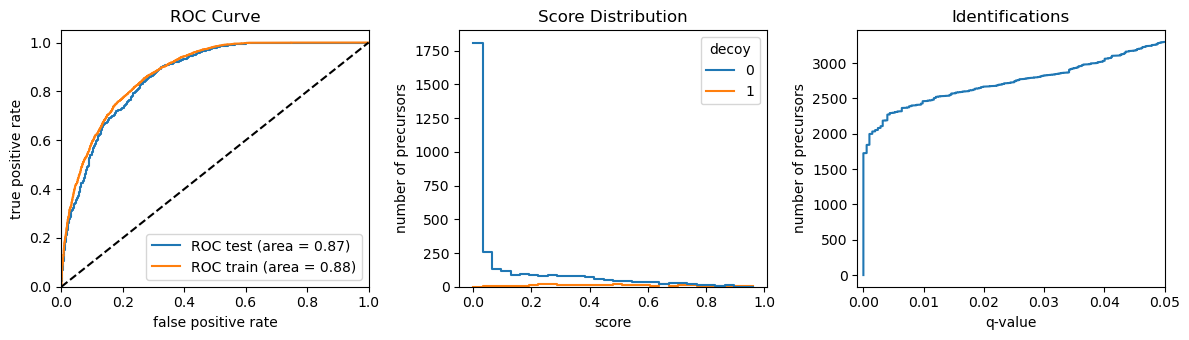

0:45:07.405498  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:45:07.408444  PROGRESS: Accumulated precursors: 3,801, 0.01 FDR: 2,462, 0.001 FDR: 1,843
0:45:07.411271  INFO: calibration group: precursor, fitting mz estimator 


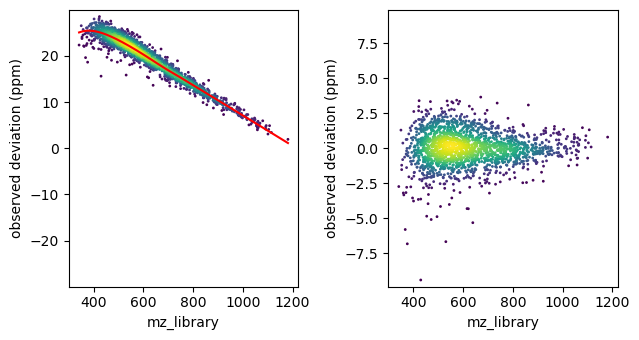

0:45:07.650528  INFO: calibration group: precursor, fitting rt estimator 


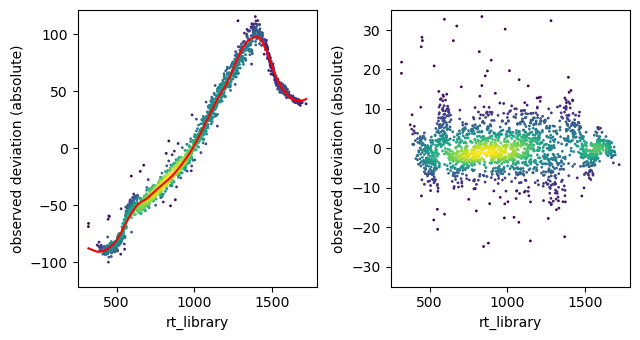

0:45:07.856517  INFO: calibration group: precursor, fitting mobility estimator 


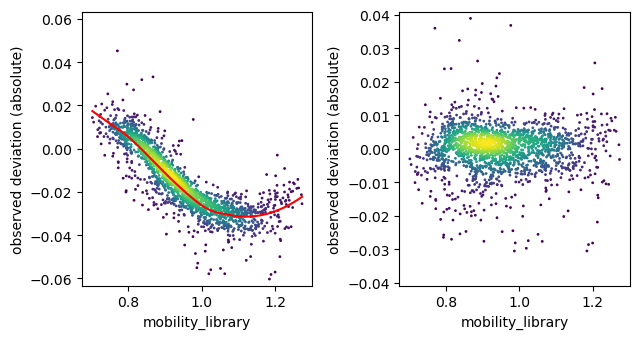

0:45:08.136363  INFO: calibration group: fragment, fitting mz estimator 


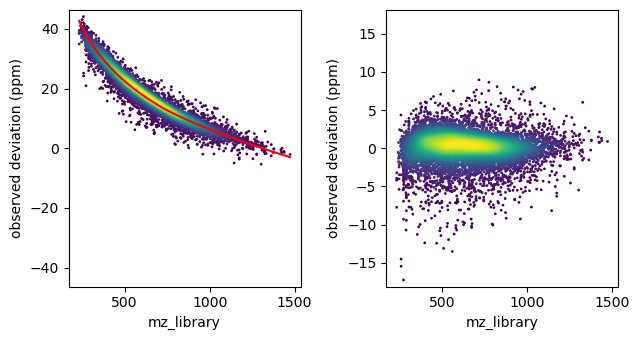

0:45:09.413127  INFO: calibration group: precursor, predicting mz
0:45:09.496710  INFO: calibration group: precursor, predicting rt
0:45:09.594724  INFO: calibration group: precursor, predicting mobility
0:45:09.621970  INFO: calibration group: fragment, predicting mz
0:45:11.613482  INFO: calibration group: precursor, predicting mz
0:45:11.691844  INFO: calibration group: precursor, predicting rt
0:45:11.782771  INFO: calibration group: precursor, predicting mobility
0:45:11.860974  INFO: calibration group: fragment, predicting mz
0:45:13.780797  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:45:13.799224  INFO: Duty cycle consists of 6 frames, 0.69 seconds cycle time
0:45:13.800205  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:45:13.801365  INFO: FWHM in RT is 3.67 seconds, sigma is 1.14
0:45:13.803652  INFO: FWHM in mobility is 0.005 1/K_0, sigma is 3.36


88132


100%|██████████| 280889/280889 [00:54<00:00, 5120.97it/s]
0:51:24.970979  INFO: Scored 280889 candidates
0:51:25.115825  INFO: 4.09% of targets failed, 6.35% of decoys failed


(266228, 25)
(266228,)


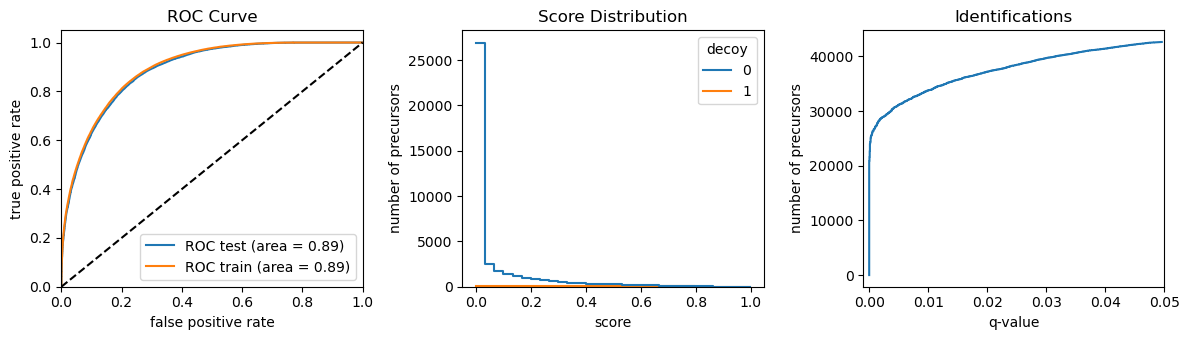

0:52:03.680448  PROGRESS: === extraction finished, 0.05 FDR: 40,638, 0.01 FDR: 33,441, 0.001 FDR: 27,115 ===
0:52:04.809191  INFO: calibration group: precursor, predicting mz
0:52:04.838394  INFO: calibration group: precursor, predicting rt
0:52:04.903133  INFO: calibration group: precursor, predicting mobility
0:52:04.927048  INFO: calibration group: fragment, predicting mz
100%|██████████| 33441/33441 [00:02<00:00, 14517.70it/s]
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:109: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

(64660, 60)
(64660,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


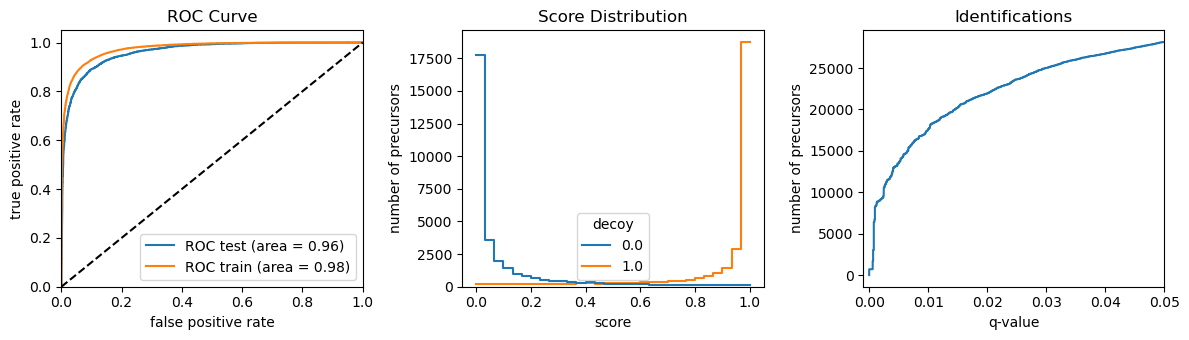

17586
3821
(64654, 60)
(64654,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['decoy'] = np.zeros(len(channel_df))
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_3480/4173405163.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


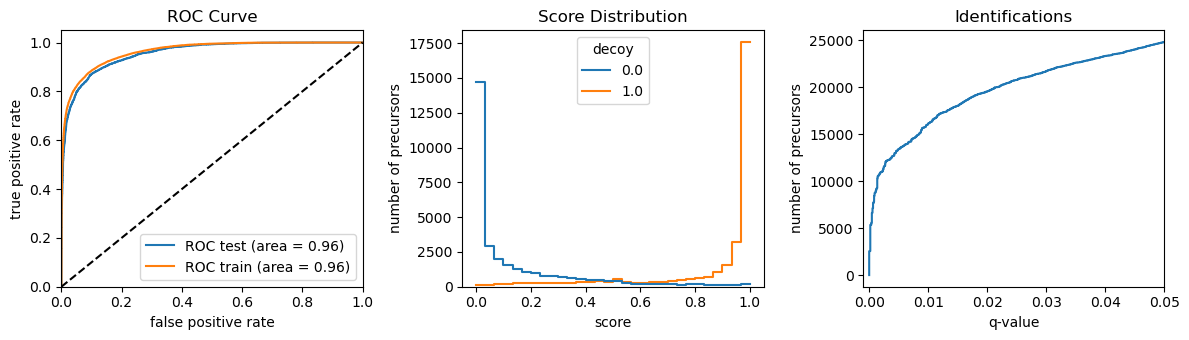

16122
3444


0:54:46.453059  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_07_S4-G2_1_660.d
0:54:46.453993  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_07_S4-G2_1_660.d
0:54:46.454238  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_07_S4-G2_1_660.d
0:54:46.990215  INFO: Reading 16,256 frames with 2,291,539,052 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_03_02_MCT_scp_hela/20230103_TIMS05_MCT_SA_HeLa_SM03p7b_Ref10_syP5-25-008ov_07_S4-G2_1_660.d
 66%|██████▋   | 10776/16256 [00:03<00:02, 2090.08it/s]

In [4]:
plan = Plan(raw_files, config_update = 
            {'extraction':
                {
                    'target_mobility_tolerance': 0.04,
                    'target_rt_tolerance': 30,
                    'target_ms1_tolerance': 10,
                    'min_epochs': 3,
                }
            }
        )
plan.from_spec_lib_base(test_lib)
for dia_data, precursors_flat, fragments_flat in plan.get_run_data():

    start_time = time.time()
    
    reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

    workflow = Workflow(
        plan.config, 
        dia_data, 
        reference_flat, 
        fragments_flat
    )

    workflow.calibration()
    d0_df = workflow.extraction()

    raw_name = precursors_flat['raw_name'].iloc[0]
    d0_df.to_csv(os.path.join(output_location, f'{raw_name}_d0.tsv'), sep = '\t', index = False)

    d0_df = d0_df[d0_df['qval'] < 0.01]
    d0_df = d0_df[d0_df['decoy'] == 0]
    workflow.calibration_manager.predict(precursors_flat, 'precursor')
    workflow.calibration_manager.predict(fragments_flat, 'fragment')

    from alphadia.extraction import utils, plexscoring, quadrupole
    import alphatims.utils
    from tqdm import tqdm
    import numba as nb

    multiplex = plexscoring.Multiplexer(precursors_flat, fragments_flat, d0_df.copy())
    candidates_df = multiplex()
    candidates_df['rank'] = np.zeros(len(candidates_df), dtype = np.int64)
    candidates_df = utils.calculate_score_groups(candidates_df, group_channels=True)

    score_group_container = plexscoring.ScoreGroupContainer()
    score_group_container.build_from_df(
        candidates_df['elution_group_idx'].values.astype(np.uint32),
        candidates_df['score_group_idx'].values.astype(np.uint32),
        candidates_df['precursor_idx'].values.astype(np.uint32),
        candidates_df['channel'].values.astype(np.uint8),
        candidates_df['flat_frag_start_idx'].values.astype(np.uint32),
        candidates_df['flat_frag_stop_idx'].values.astype(np.uint32),

        candidates_df['scan_start'].values,
        candidates_df['scan_stop'].values,
        candidates_df['scan_center'].values,
        candidates_df['frame_start'].values,
        candidates_df['frame_stop'].values,
        candidates_df['frame_center'].values,

        candidates_df['charge'].values,
        candidates_df['mz_calibrated'].values.astype(np.float32),
        candidates_df[utils.get_isotope_column_names(candidates_df.columns)].values.astype(np.float32),
    )

    q = quadrupole.SimpleQuadrupole(dia_data.cycle)
    fragment_container = plexscoring.assemble_fragments(fragments_flat)

    config = plexscoring.CandidateConfig()
    config.max_cardinality = 1
    config.score_grouped = True

    alphatims.utils.set_threads(10)

    plexscoring._executor(
        range(len(score_group_container)), 
        score_group_container,
        fragment_container,
        dia_data,
        config.jitclass(),
        q.jit,
        False
    )

    dict_list = []
    precursor_idx_list = []
    channel_list = []


    for elem in tqdm(score_group_container):
        for i, candidate in enumerate(elem.candidates):
            if (len(candidate.features) > 0) and (candidate.channel != 0):
                
                precursor_idx_list.append(candidate.precursor_idx)
                dict_list.append(candidate.features)
                channel_list.append(candidate.channel)

    df = pd.DataFrame(dict_list)
    df['precursor_idx'] = precursor_idx_list
    df['channel'] = channel_list

    df = df.merge(
        precursors_flat[['precursor_idx', 'decoy', 'proteins',]],
        on='precursor_idx',
        how='left'
    )

    features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
    all_feature_columns = list(set(features_df.columns) - set(['channel', 'precursor_idx','decoy','proteins']))

    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    from sklearn.neural_network import MLPClassifier

    from alphadia.library import fdr_to_q_values

    output_dfs = []

    for channel in [4,8]:
        channel_df = features_df[features_df['channel'].isin([channel, 12])]
        channel_df['decoy'] = np.zeros(len(channel_df))
        channel_df.loc[channel_df['channel'] == 12, 'decoy'] = 1

        channel_df = channel_df.dropna()

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('GBC',MLPClassifier(hidden_layer_sizes=(50, 25, 5), max_iter=1000, alpha=0.1, learning_rate='adaptive', learning_rate_init=0.001, early_stopping=True, tol=1e-6))
        ])

        X = channel_df[all_feature_columns].values
        y = channel_df['decoy'].values

        
        

        print(X.shape)
        print(y.shape)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        pipeline.fit(X_train, y_train)
        

        y_test_proba = pipeline.predict_proba(X_test)[:,1]
        y_test_pred = np.round(y_test_proba)

        y_train_proba = pipeline.predict_proba(X_train)[:,1]
        y_train_pred = np.round(y_train_proba)

        channel_df['proba'] = pipeline.predict_proba(X)[:,1]
        # subset to the best candidate for every precursor
        channel_df = channel_df.sort_values(by=['proba'], ascending=True)
        features_best_df = channel_df


        # ROC curve
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
        roc_auc_test = auc(fpr_test, tpr_test)

        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
        roc_auc_train = auc(fpr_train, tpr_train)

        
        
        # plotting

        fig, axs = plt.subplots(ncols=3, figsize=(12,3.5))

        axs[0].plot(fpr_test, tpr_test,label="ROC test (area = %0.2f)" % roc_auc_test)
        axs[0].plot(fpr_train, tpr_train,label="ROC train (area = %0.2f)" % roc_auc_train)

        axs[0].plot([0, 1], [0, 1], color="k", linestyle="--")
        axs[0].set_xlim([0.0, 1.0])
        axs[0].set_ylim([0.0, 1.05])
        axs[0].set_xlabel("false positive rate")
        axs[0].set_ylabel("true positive rate")
        axs[0].set_title("ROC Curve")
        axs[0].legend(loc="lower right")
        
        sns.histplot(data=features_best_df, x='proba', hue='decoy', bins=30, element="step", fill=False, ax=axs[1])
        axs[1].set_xlabel('score')
        axs[1].set_ylabel('number of precursors')
        axs[1].set_title("Score Distribution")

        features_best_df = features_best_df.sort_values(['proba'], ascending=True)
        target_values = 1-features_best_df['decoy'].values
        decoy_cumsum = np.cumsum(features_best_df['decoy'].values)
        target_cumsum = np.cumsum(target_values)
        fdr_values = decoy_cumsum/target_cumsum
        features_best_df['qval'] = fdr_to_q_values(fdr_values)
        q_val = features_best_df[features_best_df['qval'] <0.05 ]['qval'].values

        ids = np.arange(0, len(q_val), 1)
        axs[2].plot(q_val, ids)
        axs[2].set_xlim(-0.001, 0.05)
        axs[2].set_xlabel('q-value')
        axs[2].set_ylabel('number of precursors')
        axs[2].set_title("Identifications")
        
        fig.tight_layout()
        plt.show()

        print(len(features_best_df[features_best_df['qval'] <=0.01 ]['qval']))
        print(features_best_df[features_best_df['qval'] <=0.01 ]['proteins'].nunique())


        output_dfs.append(features_best_df[features_best_df['qval'] <=0.01])

    del dia_data

    stop_time = time.time()
    duration = stop_time - start_time

    duration_df = pd.DataFrame({'raw_name': [raw_name], 'duration': [duration]})
    duration_df.to_csv(os.path.join(output_location, f'{raw_name}_duration.tsv'), sep = '\t', index = False)

    output_dfs = pd.concat(output_dfs)
    output_dfs.to_csv(os.path.join(output_location, f'{raw_name}_d4_d8.tsv'), sep = '\t', index = False)
    